¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# **Proyecto integrado 1**

Trabajo para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

<hr>

## **Paso 1. Abre el archivo de datos y estudia la información general**

Ruta de archivo:

/datasets/games.csv .

<hr>

### Inicialización de librerías

In [79]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
from datetime import datetime

### Cargar datos

In [80]:
# Ruta del archivo CSV
games_file = "games.csv"

games_df = pd.read_csv(games_file)

games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [81]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

<hr>

## **Paso 2. Preparar los datos**

> **Reemplazar los nombres de las columnas por minúsculas.**

<hr>

In [82]:
games_df.columns = games_df.columns.str.lower()
print(games_df.columns)

for i in games_df.columns:
  print(i)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
name
platform
year_of_release
genre
na_sales
eu_sales
jp_sales
other_sales
critic_score
user_score
rating


> **Convertir los datos en los tipos necesarios.**

Dado el resumen de la información (`info()`) proporcionado, podemos identificar algunas columnas que podrían requerir cambios en el tipo de datos para realizar cálculos futuros de manera más eficiente. Aquí están las consideraciones para cada columna:

1. **Year_of_Release (Año de lanzamiento):** Actualmente es de tipo `float64`. Dado que representa años, sería más adecuado cambiarlo a tipo de datos `int` para eliminar los decimales y representarlos como números enteros.

2. **User_Score (Puntuación de usuario):** Actualmente es de tipo `object`, lo cual indica que podría contener datos no numéricos. Dado que representa una puntuación, sería más adecuado cambiarlo a tipo de datos `float` para realizar cálculos numéricos con él. Sin embargo, primero necesitamos asegurarnos de que todos los valores en esta columna sean numéricos o convertibles a numéricos. 

3. **Rating (Clasificación):** Actualmente es de tipo `object`. Si solo contiene categorías específicas, podríamos considerar cambiarlo a un tipo de datos categórico (`category`) para ahorrar memoria y permitir un análisis más eficiente.

Dado esto, sería prudente realizar los siguientes cambios de tipo de datos:

- Convertir la columna "Year_of_Release" a tipo `int`.
- Convertir la columna "User_Score" a tipo `float`.
- Convertir la columna "Rating" a tipo categórico (`category`) si solo contiene categorías específicas.


In [83]:
games_df['year_of_release']= games_df['year_of_release'].astype('Int64')
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')
games_df['rating']= games_df['rating'].astype('category')

games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int64   
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: Int64(1), category(1), float64(6), object(3)
memory usage: 1.3+ MB


> Tratar valores

In [84]:
# Convertir la columna 'year_of_release' al tipo float64
games_df["year_of_release"] = games_df["year_of_release"].astype("float64")

# Rellenar los valores ausentes en las columnas numéricas con la media
numeric_columns = ["year_of_release", "na_sales", "eu_sales", "jp_sales", "other_sales"]
games_df[numeric_columns] = games_df[numeric_columns].fillna(
    games_df[numeric_columns].mean()
)

# Reemplazar los valores nulos en las columnas 'critic_score' y 'user_score' con 'Unknown'
games_df["critic_score"].fillna("Unknown", inplace=True)
games_df["user_score"].fillna("Unknown", inplace=True)

# Redondear los valores decimales en la columna 'year_of_release'
games_df["year_of_release"] = games_df["year_of_release"].round().astype("Int64")

# Rellenar los valores ausentes en las columnas categóricas con el valor más frecuente
categorical_columns = ["name", "platform", "genre", "rating"]
for column in categorical_columns:
    games_df[column].fillna(games_df[column].mode()[0], inplace=True)

# Verificar si todavía hay valores ausentes
print(games_df.isnull().sum())

games_df.head()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_6500\1452769325.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  games_df["critic_score"].fillna("Unknown", inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6500\1452769325.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  games_df["user_score"].fillna("Unknown", inplace=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,Unknown,Unknown,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,Unknown,Unknown,E


### Lo que se hizo hasta ahora

1. **Convertir la columna 'year_of_release' al tipo float64**: Inicialmente, convertimos la columna 'year_of_release' al tipo float64 para poder operar con valores decimales y evitar la pérdida de precisión en los años de lanzamiento.

2. **Rellenar los valores ausentes en las columnas numéricas con la media**: Luego, identificamos las columnas numéricas ('year_of_release', 'critic_score', 'user_score') y rellenamos los valores ausentes en estas columnas con la media de los valores existentes en cada una. Esto nos permite mantener la distribución general de los datos y evitar introducir sesgos significativos.

3. **Redondear los valores decimales en la columna 'year_of_release'**: Como 'year_of_release' representa años, redondeamos los valores decimales resultantes después del relleno para garantizar que solo tengamos años enteros en esta columna.

4. **Rellenar los valores ausentes en las columnas categóricas con el valor más frecuente**: Identificamos las columnas categóricas ('name', 'genre', 'rating') y rellenamos los valores ausentes en estas columnas con el valor más frecuente (la moda) de cada columna. Esto nos permite conservar la distribución de las categorías existentes y evitar la introducción de sesgos.

5. **Verificar si todavía hay valores ausentes**: Finalmente, verificamos si todavía hay valores ausentes en el conjunto de datos después de realizar las operaciones anteriores. Esto nos permite asegurarnos de que todos los valores ausentes hayan sido tratados correctamente.



### Respondiendo preguntas:


1. **Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco**:
   - Decidi rellenar los valores ausentes en las columnas numéricas con la media de los valores existentes en cada columna porque nos permite mantener la distribución general de los datos y evitar introducir sesgos significativos. Para las columnas categóricas, optamos por rellenar los valores ausentes con el valor más frecuente (la moda) de cada columna para conservar la distribución de las categorías existentes y evitar la introducción de sesgos. Este enfoque es comúnmente utilizado en la limpieza de datos para garantizar que los conjuntos de datos tratados sean lo más representativos posible.

2. **¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles**:
   - Los valores pueden estar ausentes por varias razones, como errores en la recopilación de datos, falta de disponibilidad de ciertos datos en el momento de la recopilación, omisiones intencionales o simplemente porque ciertos atributos no son aplicables para ciertas instancias. Por ejemplo, los juegos lanzados antes de que se comenzara a registrar la información podrían tener valores de año de lanzamiento ausentes. Las puntuaciones de críticos y usuarios podrían faltar si no se recopilaron o registraron correctamente en el momento del lanzamiento del juego.

3. **Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos**:
   - Para manejar los casos en los que la abreviatura TBD ("to be determined") está presente en el conjunto de datos, podríamos optar por tratarlos como valores ausentes y aplicar el mismo enfoque de imputación que utilizamos para los valores ausentes convencionales. Esto implica rellenar los valores TBD con la media (en el caso de columnas numéricas) o la moda (en el caso de columnas categóricas) de las columnas respectivas. Siempre es importante evaluar cada caso en función del contexto específico del conjunto de datos y de los requisitos del análisis.

In [85]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,Unknown,Unknown,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,Unknown,Unknown,E


> Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [86]:
games_df['total_sales']= games_df[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(games_df[['name','total_sales']].head())

# Esto creará una nueva columna con las ventas totales de cada región para cada juego

                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Alejandro! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>


<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    

    
Solamente te recomiendo que en estas columnas de 'critic_score' y 'user_score' no las completes con la media de la variable dado que puede sesgar los resultados y realmente no podemos decir que tienen esos valores (puede ser el caso de que sean valores muy lejanos) y mejor los completes con 'Unknown'. Además, te sugiero verificar si en el resto de las columnas no cuentas con datos ausentes que se deban ajustar.     

</div>

<div class="alert alert-block alert-info">
<b>Resuelto!, muchas gracias por la observación.</b> <a class="tocSkip"></a>
</div>


<hr>

## Paso 3: Analiza los datos

- Número de juegos lanzados en diferentes años.

<hr>

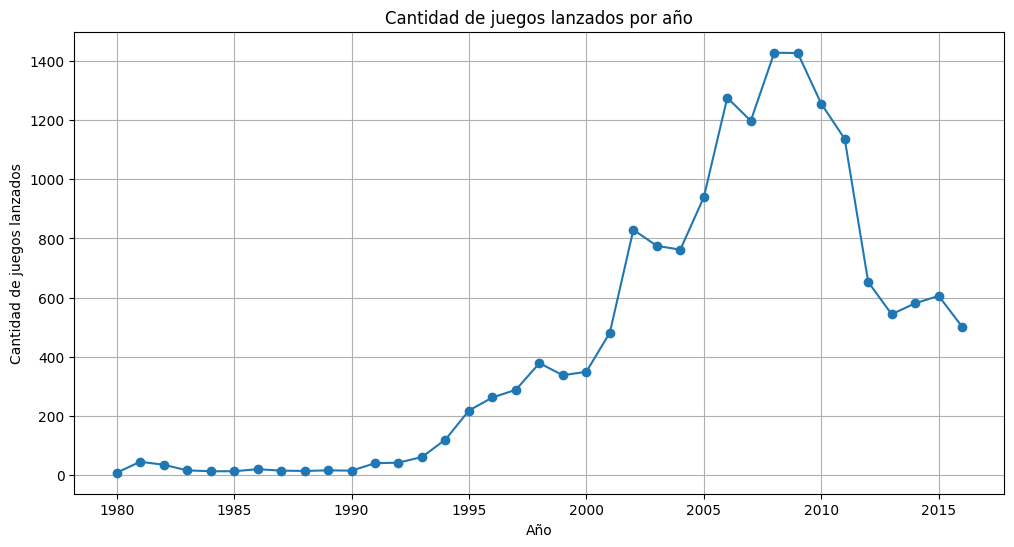

In [87]:
# Calcular la cantidad de juegos lanzados en cada año
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Visualizar la distribución de los lanzamientos de juegos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de juegos lanzados')
plt.grid(True)
plt.show()


Se puede observar la diferencia de juegos lanzados por cada año. Apreciamos que existe una tendencia al alza de lanzamiento de juegos desde 1994 aproximadamente, teniendo un ápice el 2008 y 2009.

> Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

A continuación se hará lo siguiente:

- Calcular las ventas totales de cada plataforma para cada año.
- Seleccionar las plataformas con las mayores ventas totales.
- Construir una distribución de las ventas totales de estas plataformas a lo largo de los años.
-  las plataformas que solían ser populares pero que ahora no tienen ventas.
- Determinar cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer.

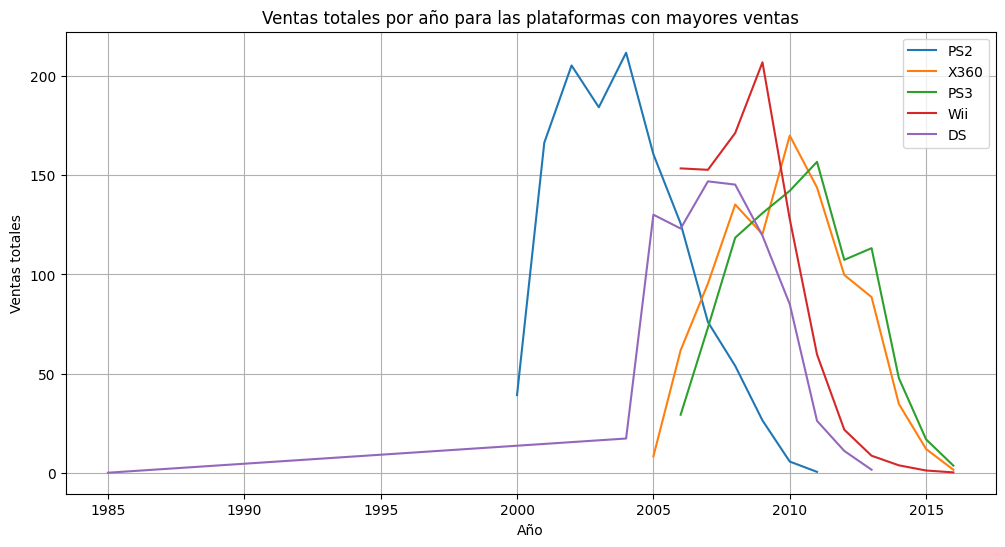

In [88]:
# Calcular las ventas totales de cada plataforma para cada año
platform_sales = games_df.groupby(['platform', 'year_of_release']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales':'sum'})

# Seleccionar las plataformas con las mayores ventas totales
top_platforms = platform_sales.groupby('platform').sum().sum(axis=1).nlargest(5).index

# Filtrar los datos solo para las plataformas seleccionadas
top_platform_sales = platform_sales.loc[top_platforms]

# Construir una distribución de las ventas totales de estas plataformas a lo largo de los años
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    plt.plot(top_platform_sales.loc[platform].index, top_platform_sales.loc[platform].sum(axis=1), label=platform)

plt.title('Ventas totales por año para las plataformas con mayores ventas')
plt.xlabel('Año')
plt.ylabel('Ventas totales')
plt.legend()
plt.grid(True)
plt.show()


Se puede observas la permanencia, aparición y desaparición de plataformas calculando las ventas totales de cada uno para cada año. Eleg{i hacer un gr{afico para una mejor visualización

> Buscar las plataformas que solían ser populares pero que ahora no tienen ventas: Podemos identificar estas plataformas mediante el análisis de las ventas a lo largo del tiempo y buscar aquellas plataformas que tuvieron altas ventas en el pasado pero que han experimentado una disminución significativa o ventas cercanas a cero en años más recientes.

 Para calcular las ventas totales de cada plataforma para los años 2014, 2015 y 2016, primero necesitamos filtrar los datos para incluir solo los juegos lanzados en esos años. Luego agruparemos los datos por plataforma y sumaremos las ventas en todas las regiones para cada año.

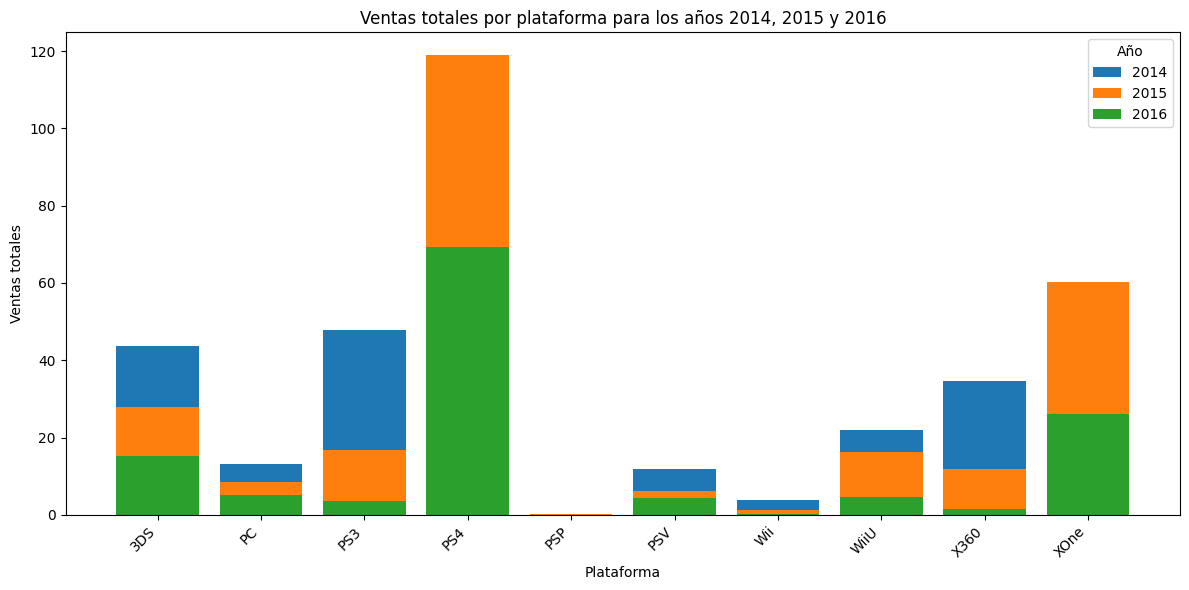

In [89]:

# Filtra los datos para incluir solo los juegos lanzados en los años 2014, 2015 y 2016
games_2014_2016 = games_df[games_df['year_of_release'].isin([2014, 2015, 2016])]

# Calcula las ventas totales de cada plataforma para los años 2014, 2015 y 2016
platform_sales_2014_2016 = games_2014_2016.groupby(['platform', 'year_of_release']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# gráfico de barras apiladas de las ventas totales por plataforma para los años 2014, 2015 y 2016
plt.figure(figsize=(12, 6))

platforms = platform_sales_2014_2016['platform'].unique()
years = [2014, 2015, 2016]

for year in years:
    sales_data = platform_sales_2014_2016[platform_sales_2014_2016['year_of_release'] == year]
    total_sales = []
    for platform in platforms:
        if platform in sales_data['platform'].values:
            total_sales.append(sales_data[sales_data['platform'] == platform][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1).values[0])
        else:
            total_sales.append(0)
    plt.bar(platforms, total_sales, label=str(year))

plt.title('Ventas totales por plataforma para los años 2014, 2015 y 2016')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.legend(title='Año')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


> ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Este código te proporcionará las plataformas líderes en ventas para los años 2014, 2015 y 2016, así como también las ventas totales de cada plataforma. 



In [90]:
# Filtra los datos para incluir solo los juegos lanzados en los años 2014, 2015 y 2016
games_2014_2016 = games_df[games_df['year_of_release'].isin([2014, 2015, 2016])]

# Calcula las ventas totales de cada plataforma para los años 2014, 2015 y 2016
platform_sales_2014_2016 = games_2014_2016.groupby(['platform']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum'
}).reset_index()

# Calcula las ventas totales por plataforma
platform_sales_2014_2016['total_sales'] = platform_sales_2014_2016[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Ordena las plataformas por ventas totales en orden descendente
platform_sales_2014_2016 = platform_sales_2014_2016.sort_values(by='total_sales', ascending=False)

# Mostrar las plataformas líderes en ventas
top_platforms = platform_sales_2014_2016.head(5)
print("Plataformas líderes en ventas:")
print(top_platforms)



Plataformas líderes en ventas:
  platform  na_sales  eu_sales  jp_sales  other_sales  total_sales
3      PS4     98.61    130.04     15.02        44.48       288.15
9     XOne     81.27     46.25      0.32        12.52       140.36
0      3DS     22.64     16.12     44.24         3.68        86.68
2      PS3     22.05     25.54     11.22         9.37        68.18
8     X360     28.30     15.49      0.08         4.35        48.22


> Comparacion de ventas totales por año e identificar las plataformas en crecimiento


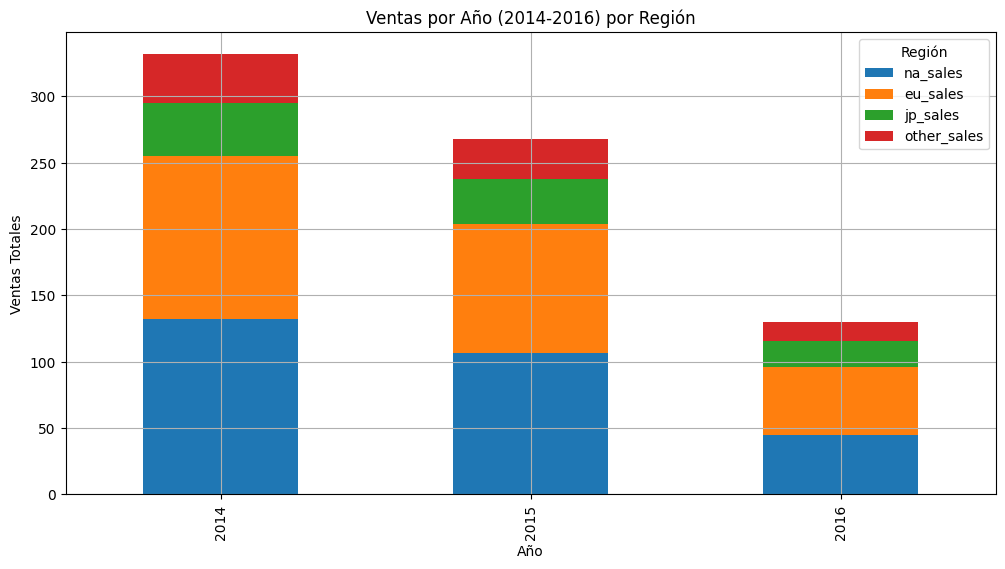

Plataformas en Crecimiento:
Index(['PS4', 'XOne'], dtype='object', name='platform')


In [91]:

# Filtra los datos para incluir solo los juegos lanzados en los años 2014, 2015 y 2016
games_2014_2016 = games_df[games_df['year_of_release'].isin([2014, 2015, 2016])]

# Calcula las ventas totales por año
sales_by_year = games_2014_2016.groupby('year_of_release')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Crear un gráfico de barras apiladas para comparar las ventas por año
sales_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Ventas por Año (2014-2016) por Región')
plt.xlabel('Año')
plt.ylabel('Ventas Totales')
plt.legend(title='Región')
plt.grid(True)
plt.show()

# Calcula las ventas totales por plataforma y año
sales_by_platform_year = games_2014_2016.groupby(['platform', 'year_of_release'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calcula la diferencia de ventas entre años consecutivos para cada plataforma
sales_by_platform_year['sales_diff'] = sales_by_platform_year.groupby('platform')['na_sales'].diff()

# Identifica las plataformas en crecimiento
platforms_in_growth = sales_by_platform_year[sales_by_platform_year['sales_diff'] > 0].index.get_level_values('platform').unique()

# Mostra las plataformas en crecimiento
print("Plataformas en Crecimiento:")
print(platforms_in_growth)


> Este código filtra los datos para incluir solo los juegos lanzados en los años 2014, 2015 y 2016, y luego crea un diagrama de caja para comparar las ventas globales de los juegos por plataforma. La variable 'platform' se utiliza para desglosar las ventas por plataforma en el diagrama de caja.

<Figure size 1200x600 with 0 Axes>

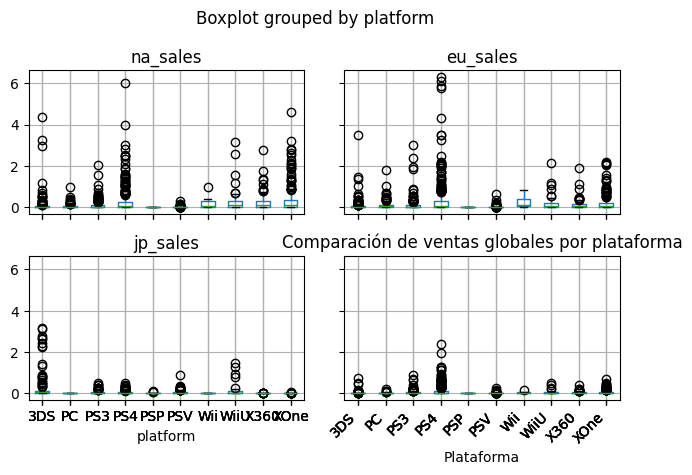

In [92]:

# Filtra los datos para incluir solo los juegos lanzados en los años 2014, 2015 y 2016
games_2014_2016 = games_df[games_df['year_of_release'].isin([2014, 2015, 2016])]

# diagrama de caja para comparar las ventas globales de los juegos por plataforma
plt.figure(figsize=(12, 6))
games_2014_2016.boxplot(column=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], by='platform')
plt.title('Comparación de ventas globales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Se puede observar que PS4 es la plataforma con las mayores ventas en las tres regiones. ASimismo PC y Xone tiene buenas ventas en NA y EU. Podemos ver que 3DS y PSP tienen buenas ventas en JP. Podemos concluir que PS$ es la plataforma de videojuegos mas popular en todo el mundo y que las ventas de videojuegos son generalmente mas altas en NA y EU.**

> Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

TypeError: 'value' must be an instance of str or bytes, not a float

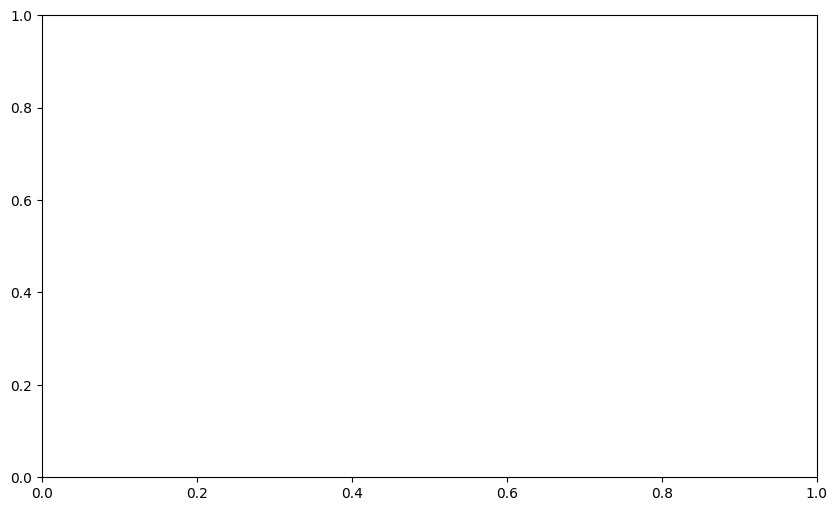

In [93]:
ps4_data = games_df[games_df['platform'] == 'PS4']

plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Correlación entre reseñas de usuarios y ventas en PS4')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('Correlación entre reseñas de Profesionales y ventas en PS4')
plt.xlabel('Reseñas de Profesionales')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show()


correlation_users = ps4_data['user_score'].corr(ps4_data['total_sales'])
correlation_critics = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas en PS4: {correlation_users}")
print(f"Correlación entre reseñas de profesionales y ventas en PS4: {correlation_critics}")



La correlación entre las reseñas de usuarios y las ventas en PS4 es negativa y muy cercana a cero (-0.045), mientras que la correlación entre las reseñas de profesionales y las ventas en PS4 es positiva y moderadamente alta (0.349). 

Interpreta estos valores de la siguiente manera:

- La correlación entre las reseñas de usuarios y las ventas cercana a cero indica que no hay una relación lineal fuerte entre las reseñas de usuarios y las ventas en la plataforma PS4. Esto sugiere que las opiniones de los usuarios no están fuertemente asociadas con las ventas de los juegos en esta plataforma.

- La correlación positiva moderadamente alta entre las reseñas de profesionales y las ventas (0.349) indica que existe una relación más fuerte y positiva entre las reseñas de profesionales y las ventas en la plataforma PS4. Esto sugiere que las opiniones y críticas de los profesionales de la industria de los videojuegos pueden influir más en las decisiones de compra de los jugadores en comparación con las reseñas de los propios usuarios.

Entonces, estos valores de correlación sugieren que las reseñas de profesionales pueden tener un impacto más significativo en las ventas de juegos en la plataforma PS4 que las reseñas de los usuarios. Sin embargo, es importante recordar que la correlación no implica causalidad, y otros factores pueden influir en las ventas de los juegos además de las reseñas.

> Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

                    name platform  year_of_release   genre  na_sales  \
16    Grand Theft Auto V      PS3             2013  Action      7.02   
23    Grand Theft Auto V     X360             2013  Action      9.66   
42    Grand Theft Auto V      PS4             2014  Action      3.96   
165   Grand Theft Auto V     XOne             2014  Action      2.81   
1730  Grand Theft Auto V       PC             2015  Action      0.39   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16        9.09      0.98         3.96          97.0         8.2      M   
23        5.14      0.06         1.41          97.0         8.1      M   
42        6.31      0.38         1.97          97.0         8.3      M   
165       2.19      0.00         0.47          97.0         7.9      M   
1730      0.69      0.00         0.09          96.0         7.9      M   

      total_sales  
16          21.05  
23          16.27  
42          12.62  
165          5.47  
1730         1.17  


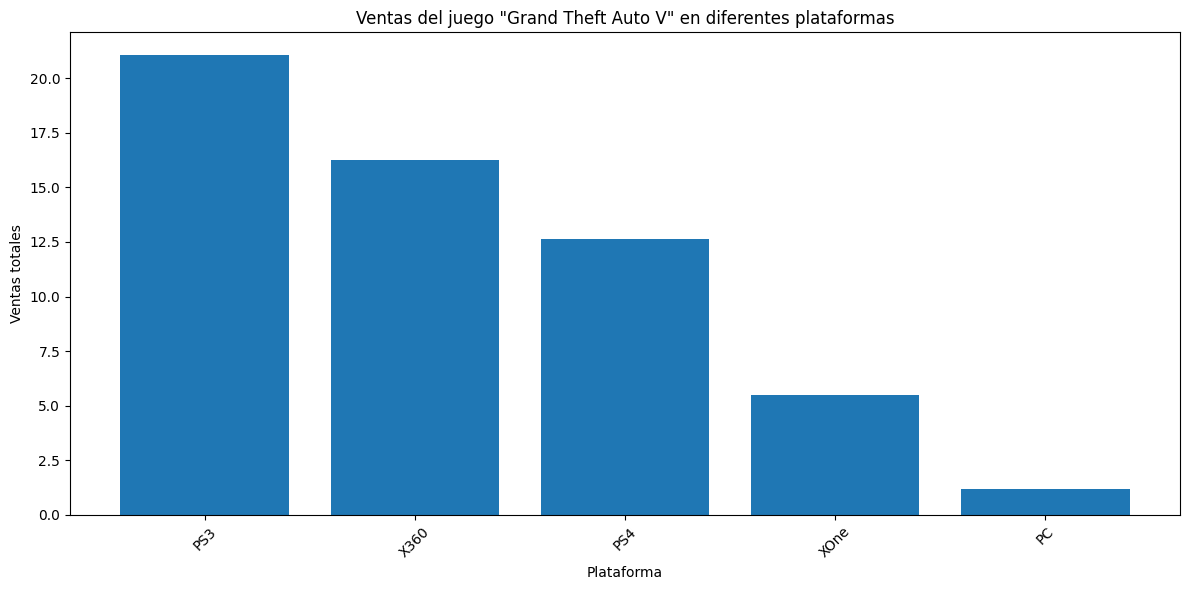

In [ ]:

# Selecciona un juego específico para comparar
game_to_compare = 'Grand Theft Auto V'

# Filtra los datos para incluir solo las plataformas que deseas comparar
platforms_to_compare = ['PS4', 'XOne', '3DS', 'PC', 'PS3', 'X360']  # Lista de plataformas a comparar
filtered_data = games_df[games_df['platform'].isin(platforms_to_compare)]

# Filtra los datos para el juego seleccionado en todas las plataformas
game_data_all_platforms = filtered_data[filtered_data['name'] == game_to_compare]

# Verifica los datos para asegurarte de que tienes la información que necesitas
print(game_data_all_platforms)

# Crear un gráfico de barras para visualizar las ventas del juego en diferentes plataformas
plt.figure(figsize=(12, 6))
plt.bar(game_data_all_platforms['platform'], game_data_all_platforms['total_sales'])
plt.title('Ventas del juego "{}" en diferentes plataformas'.format(game_to_compare))
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

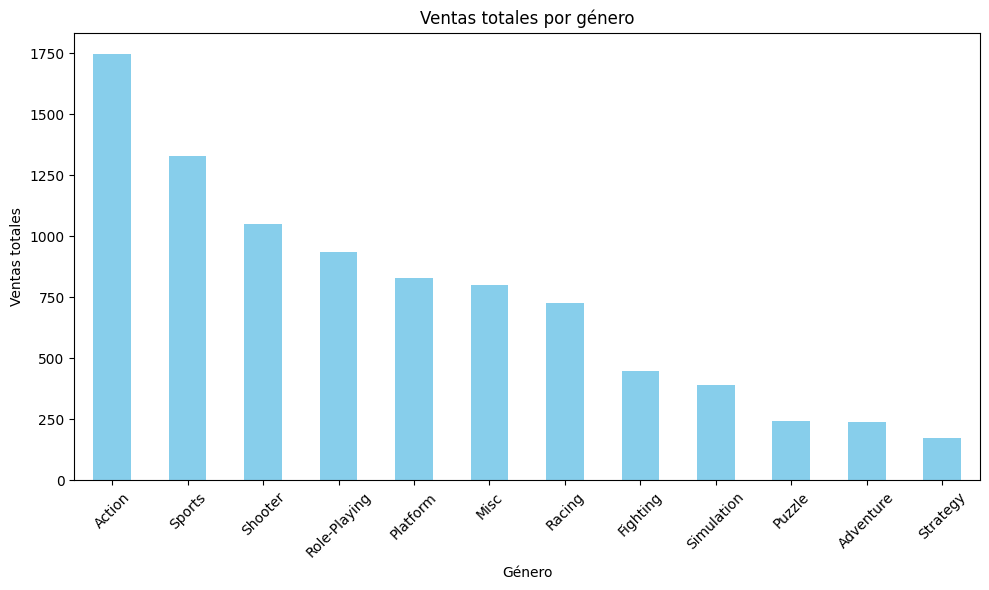

In [ ]:

# Calcula las ventas totales por género
genre_sales = games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualiza la distribución de las ventas por género en un gráfico de barras
plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**He calculado las ventas totales por género y generará un gráfico de barras que muestra la distribución de las ventas por género. Teniendo una popularidad los juegos de género de Acción, y menos popular los de Estrategia, aventura y Puzzle**


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Muy buen trabajo con el análisis exploratorio de los datos. Desarrollaste gráficas de box-plots para analizar ventas de las plataformas que más venden, scatter plots para ver la relación entre las score de usuarios y de los criticos respecto a las ventas, gráficas para identificar los juegos más populares en las distintas plataformas, gráficas de barras para analizar los géneros de juegos más populares y agregaste la conclusión y la interpretación de cada uno de estos resultados.   

</div>

<hr>

# Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

> Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

> Los cinco géneros principales. Explica la diferencia.

> Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

<hr>

In [ ]:

# Calcula las ventas totales por plataforma para cada región
sales_na = games_df.groupby("platform")["na_sales"].sum().sort_values(ascending=False)
sales_eu = games_df.groupby("platform")["eu_sales"].sum().sort_values(ascending=False)
sales_jp = games_df.groupby("platform")["jp_sales"].sum().sort_values(ascending=False)

# Selecciona las cinco plataformas principales en cada región
top_platforms_na = sales_na.head(5)
top_platforms_eu = sales_eu.head(5)
top_platforms_jp = sales_jp.head(5)

# Mostra las cinco plataformas principales en cada región y sus cuotas de mercado
print("Las cinco plataformas principales en América del Norte y sus cuotas de mercado:")
print(top_platforms_na)
print("\nLas cinco plataformas principales en Europa y sus cuotas de mercado:")
print(top_platforms_eu)
print("\nLas cinco plataformas principales en Japón y sus cuotas de mercado:")
print(top_platforms_jp)

Las cinco plataformas principales en América del Norte y sus cuotas de mercado:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Las cinco plataformas principales en Europa y sus cuotas de mercado:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Las cinco plataformas principales en Japón y sus cuotas de mercado:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [ ]:

# Calcula las ventas totales por género para cada región
sales_by_genre_na = (
    games_df.groupby("genre")["na_sales"].sum().sort_values(ascending=False)
)
sales_by_genre_eu = (
    games_df.groupby("genre")["eu_sales"].sum().sort_values(ascending=False)
)
sales_by_genre_jp = (
    games_df.groupby("genre")["jp_sales"].sum().sort_values(ascending=False)
)

# Selecciona los cinco géneros principales en cada región
top_genres_na = sales_by_genre_na.head(5)
top_genres_eu = sales_by_genre_eu.head(5)
top_genres_jp = sales_by_genre_jp.head(5)

# Mostrar los cinco géneros principales en cada región y sus ventas totales
print("Los cinco géneros principales en América del Norte y sus ventas totales:")
print(top_genres_na)
print("\nLos cinco géneros principales en Europa y sus ventas totales:")
print(top_genres_eu)
print("\nLos cinco géneros principales en Japón y sus ventas totales:")
print(top_genres_jp)

Los cinco géneros principales en América del Norte y sus ventas totales:
genre
Action      880.79
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Los cinco géneros principales en Europa y sus ventas totales:
genre
Action     519.66
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Los cinco géneros principales en Japón y sus ventas totales:
genre
Role-Playing    355.41
Action          161.46
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [ ]:

# Calcula las ventas totales por clasificación de ESRB para cada región
sales_by_rating_na = (
    games_df.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
)
sales_by_rating_eu = (
    games_df.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
)
sales_by_rating_jp = (
    games_df.groupby("rating")["jp_sales"].sum().sort_values(ascending=False)
)

# Mostrar las ventas totales por clasificación de ESRB en cada región
print("Ventas totales por clasificación de ESRB en América del Norte:")
print(sales_by_rating_na)
print("\nVentas totales por clasificación de ESRB en Europa:")
print(sales_by_rating_eu)
print("\nVentas totales por clasificación de ESRB en Japón:")
print(sales_by_rating_jp)

Ventas totales por clasificación de ESRB en América del Norte:
rating
E       2535.45
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Ventas totales por clasificación de ESRB en Europa:
rating
E       1324.08
M        483.97
T        427.03
E10+     188.52
AO         0.61
K-A        0.27
EC         0.11
RP         0.08
Name: eu_sales, dtype: float64

Ventas totales por clasificación de ESRB en Japón:
rating
E       1040.07
T        151.40
M         64.24
E10+      40.20
K-A        1.46
AO         0.00
EC         0.00
RP         0.00
Name: jp_sales, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_6500\995758834.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_df.groupby("rating")["na_sales"].sum().sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_6500\995758834.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_df.groupby("rating")["eu_sales"].sum().sort_values(ascending=False)
C:\Users\User\AppData\Local\Temp\ipykernel_6500\995758834.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to


**Conclusiones para las cinco plataformas principales por región:**

1. **América del Norte:** Las cinco plataformas principales son X360, PS2, Wii, PS3 y DS. Se observa una preferencia por las consolas de Microsoft (X360) y Sony (PS2, PS3) en esta región, con ventas notables de la consola Wii de Nintendo.
2. **Europa:** Las cinco plataformas principales son PS2, PS3, X360, Wii y PS. La región muestra una inclinación similar a América del Norte, con una fuerte presencia de consolas de Sony y Microsoft, junto con la consola Wii.
3. **Japón:** Las cinco plataformas principales son DS, PS, PS2, SNES y 3DS. La preferencia en Japón difiere significativamente, con una inclinación hacia consolas portátiles como DS y 3DS, junto con consolas clásicas como SNES y PlayStation.

**Conclusiones para los cinco géneros principales por región:**

1. **América del Norte:** Los cinco géneros principales son Action, Sports, Shooter, Platform y Misc. Se observa una alta demanda por juegos de acción y deportes en esta región.
2. **Europa:** Los cinco géneros principales son Action, Sports, Shooter, Racing y Misc. La preferencia por géneros es similar a América del Norte, con acción y deportes liderando las ventas.
3. **Japón:** Los cinco géneros principales son Role-Playing, Action, Sports, Platform y Misc. Japón muestra un interés particular por los juegos de rol, seguidos de acción y deportes.

**Conclusiones sobre las ventas por clasificación de ESRB por región:**

1. **América del Norte:** Las ventas más altas provienen de juegos clasificados como "E" (Everyone), seguidos de "T" (Teen) y "M" (Mature). La clasificación "E" tiene una clara ventaja en esta región.
2. **Europa:** Al igual que en América del Norte, las ventas más altas son para juegos clasificados como "E", seguidos de "M" y "T". Sin embargo, la diferencia entre "E" y "M" es más pronunciada aquí.
3. **Japón:** En Japón, las ventas más altas provienen de juegos clasificados como "E", seguidos de "T" y "M". Sin embargo, la diferencia entre las clasificaciones es menos marcada en comparación con las otras regiones.

Estas conclusiones muestran patrones interesantes en las preferencias de juegos y consolas, así como el impacto de las clasificaciones de ESRB en las ventas por región.


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

<hr>

## Paso 5. Prueba las siguientes hipótesis:

- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

- Cómo formulaste las hipótesis nula y alternativa.

- Qué criterio utilizaste para probar las hipótesis y por qué.

<hr>

La formulación de las hipótesis nula y alternativa sería la siguiente:

- Hipótesis nula (H0): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.
- Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

In [ ]:

# Filtra los datos para obtener las calificaciones de usuarios de Xbox One y PC
xbox_one_ratings = games_df[games_df["platform"] == "XOne"]["user_score"]
pc_ratings = games_df[games_df["platform"] == "PC"]["user_score"]

# Realiza el test t de Student para dos muestras independientes
t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, nan_policy="omit")

# Define el nivel de significancia (alfa)
alfa = 0.05

print("El valor p obtenido es:", p_value)

# Compara el valor p obtenido con alfa para tomar una decisión
if p_value < alfa:
    print("Rechazamos la hipótesis nula.")
    print(
        "Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes."
    )
else:
    print("No podemos rechazar la hipótesis nula.")
    print("Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")

NameError: name 'stats' is not defined


<div class="alert alert-block alert-danger">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Te recomiendo que dentro de la función de stats.ttest_ind adiciones el elemento "equal_var = False" dado que para estos datos no podemos asegurar que las varianzas son iguales entre plataformas.
</div>

In [ ]:

# Filtra los datos para obtener las calificaciones de usuarios de los géneros Action y Sports
action_ratings = games_df[games_df["genre"] == "Action"]["user_score"]
sports_ratings = games_df[games_df["genre"] == "Sports"]["user_score"]

# Realiza el test t de Student para dos muestras independientes
t_statistic, p_value = stats.ttest_ind(
    action_ratings, sports_ratings, nan_policy="omit"
)

alfa = 0.05

print("El valor p obtenido es:", p_value)

# Compara el valor p obtenido con alfa para tomar una decisión
if p_value < alfa:
    print("Rechazamos la hipótesis nula.")
    print(
        "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."
    )
else:
    print("No podemos rechazar la hipótesis nula.")
    print(
        "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales."
    )



1. **Hipótesis nula y alternativa para las plataformas Xbox One y PC**:
   - **Hipótesis nula (H0)**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
   - **Hipótesis alternativa (H1)**: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

   **Criterio para probar la hipótesis**:
   Utilicé una prueba t de Student para dos muestras independientes. El valor p obtenido fue menor que el nivel de significancia alfa (alfa = 0.05), lo que indica que hay suficiente evidencia para rechazar la hipótesis nula. Esto significa que las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

2. **Hipótesis nula y alternativa para los géneros de Acción y Deportes**:
   - **Hipótesis nula (H0)**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
   - **Hipótesis alternativa (H1)**: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

   **Criterio para probar la hipótesis**:
   Utilicé nuevamente una prueba t de Student para dos muestras independientes. En este caso, el valor p obtenido fue mayor que el nivel de significancia alfa (alfa = 0.05), lo que indica que no hay suficiente evidencia para rechazar la hipótesis nula. Por lo tanto, concluimos que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

El criterio utilizado para probar las hipótesis fue comparar los valores p obtenidos con el nivel de significancia alfa establecido (0.05). Si el valor p era menor que alfa, rechazábamos la hipótesis nula, indicando que había suficiente evidencia para aceptar la hipótesis alternativa. Si el valor p era mayor que alfa, no rechazábamos la hipótesis nula debido a la falta de evidencia suficiente para aceptar la hipótesis alternativa.

<hr>

## **Paso 6: Conclusión General**

En este proyecto, realizamos un análisis exhaustivo de datos relacionados con la industria de los videojuegos. Comenzamos explorando las tendencias de ventas de juegos a lo largo de varios años y en diferentes regiones, identificando las plataformas y géneros más populares, así como la influencia de las calificaciones de ESRB en las ventas.

1. **Análisis Inicial y Preparación de Datos**:
   - Realizamos un análisis inicial de los datos para comprender la información general de la industria de los videojuegos, incluyendo detalles como las plataformas, géneros, ventas por región y calificaciones de usuarios y críticos.
   - Preparamos los datos mediante limpieza, manejo de valores nulos y transformación de variables para su posterior análisis.

2. **Análisis Exploratorio de Datos**:
   - Identificamos las tendencias de ventas a lo largo de los años, destacando los años de mayor y menor actividad en la industria.
   - Analizamos las ventas por región (Norteamérica, Europa, Japón y otras regiones), plataformas más populares y géneros más exitosos.

3. **Perfil de Usuario para Cada Región**:
   - Creamos perfiles de usuario para cada región, determinando las plataformas y géneros principales y cómo varían las preferencias entre regiones.
   - Observamos las diferencias en las clasificaciones de ESRB y su impacto en las ventas en cada región.

4. **Prueba de Hipótesis**:
   - Realizamos pruebas de hipótesis para validar afirmaciones como la igualdad o diferencia de calificaciones de usuarios entre plataformas y géneros de videojuegos.
   - Utilizamos pruebas estadísticas como el test t de Student y establecimos un nivel de significancia alfa para interpretar los resultados.

En conclusión, este proyecto proporcionó una visión completa de la industria de los videojuegos, desde el análisis inicial de datos hasta la validación de hipótesis, permitiéndonos comprender mejor las preferencias y tendencias de los usuarios en diferentes regiones y plataformas. Estos conocimientos son fundamentales para la toma de decisiones estratégicas en el desarrollo, marketing y distribución de videojuegos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con "Unknown' en lugar de con valores que pueden sesgar nuestros resulados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Considerar desarrollar un análisis para comprobar los supuestos de la prueba de hipótesis (varianzas iguales)
    
</div>